In [20]:
%matplotlib inline

In [1]:
# analyzing citibike data

In [19]:
import pandas as pd
import psycopg2
import collections
import datetime
import matplotlib.pyplot as plt



In [9]:
conn = psycopg2.connect("dbname=getting_started user=postgres password=Gatsby")

with conn:
#open the cursor
	cur = conn.cursor()
	df = pd.read_sql_query("SELECT * FROM available_bikes ORDER BY execution_time", conn, index_col='execution_time')

In [10]:
df.head()

,_72,_79,_82,_83,_116,_119,_120,_127,_128,_137,...,_3236,_3237,_3238,_3241,_3242,_3243,_3244,_3246,_3248,_3249
execution_time,,,,,,,,,,,,,,,,,,,,,
1460588512,10,2,8,18,0,12,17,26,2,0,...,1,0,26,4,20,0,11,0,0,2
1460588573,10,2,8,18,1,12,17,28,2,0,...,1,0,26,4,20,0,10,0,0,2
1460588635,10,2,8,18,1,12,17,28,2,0,...,1,0,26,4,20,0,9,0,0,2
1460588697,10,2,8,18,1,12,17,28,2,0,...,1,0,26,4,20,0,9,0,0,2
1460588758,10,2,8,18,1,12,17,28,3,0,...,1,0,26,4,20,0,9,0,0,2


In [11]:
hour_change = collections.defaultdict(int)
for col in df.columns:
    station_vals = df[col].tolist()
    station_id = col[1:] #trim the "_"
    station_change = 0
    for k,v in enumerate(station_vals):
        if k < len(station_vals) - 1:
            station_change += abs(station_vals[k] - station_vals[k+1])
    hour_change[int(station_id)] = station_change #convert the station id back to integer

In [12]:
def keywithmaxval(d):
    """Find the key with the greatest value"""
    return max(d, key=lambda k: d[k])

# assign the max key to max_station
max_station = keywithmaxval(hour_change)

In [18]:
conn = psycopg2.connect("dbname=getting_started user=postgres password=Gatsby")

with conn:
#open the cursor
	cur = conn.cursor()

#query sqlite for reference information
cur.execute("SELECT id, stationname, latitude, longitude FROM citibike_reference WHERE id = %s", (max_station,))
data = cur.fetchone()
print("The most active station is station id %s at %s latitude: %s longitude: %s " % data)
print("With %d bicycles coming and going in the hour between %s and %s" % (
    hour_change[max_station],
    datetime.datetime.fromtimestamp(int(df.index[0])).strftime('%Y-%m-%dT%H:%M:%S'),
    datetime.datetime.fromtimestamp(int(df.index[-1])).strftime('%Y-%m-%dT%H:%M:%S'),
))

The most active station is station id 368 at Carmine St & 6 Ave latitude: 40.73038599 longitude: -74.00214988 
With 14 bicycles coming and going in the hour between 2016-04-13T18:01:52 and 2016-04-13T19:03:51


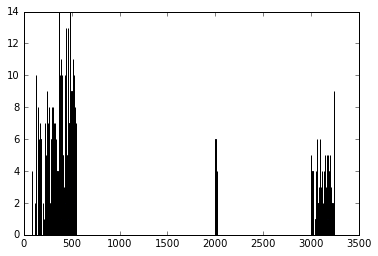

In [21]:
plt.bar(hour_change.keys(), hour_change.values())
plt.show()